In [149]:
# For reading our data set
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# For building our net
import keras
# Need this for LabelEncoder
from sklearn import preprocessing

## Read in data

In [7]:
student_data = np.array(pandas.read_table("./student-por.csv",
delimiter=";", header=0))

student_data

array([['GP', 'F', 18, ..., 0, 11, 11],
       ['GP', 'F', 17, ..., 9, 11, 11],
       ['GP', 'F', 15, ..., 12, 13, 12],
       ...,
       ['MS', 'F', 18, ..., 11, 12, 9],
       ['MS', 'M', 17, ..., 10, 10, 10],
       ['MS', 'M', 18, ..., 10, 11, 11]], dtype=object)

In [8]:
len(student_data)

# Data Cleanup

## Shuffle data

In [9]:
np.random.shuffle(student_data)

student_data

array([['GP', 'M', 15, ..., 14, 13, 14],
       ['GP', 'M', 18, ..., 14, 15, 15],
       ['GP', 'M', 16, ..., 11, 10, 11],
       ...,
       ['MS', 'F', 15, ..., 6, 7, 8],
       ['GP', 'F', 17, ..., 11, 12, 11],
       ['MS', 'M', 16, ..., 10, 10, 9]], dtype=object)

## Numerically classify scores

In [10]:
scores = student_data[:,32]

In [11]:
for i in range(len(scores)):
    if(scores[i] > 18):
        scores[i] = 4
    elif(scores[i] > 16):
        scores[i] = 3
    elif(scores[i] > 14):
        scores[i] = 2
    elif(scores[i] > 12):
        scores[i] = 1
    else:
        scores[i] = 0

In [12]:
for i in range(len(scores)):
    student_data[i,32] = scores[i]
    
student_data

array([['GP', 'M', 15, ..., 14, 13, 1],
       ['GP', 'M', 18, ..., 14, 15, 2],
       ['GP', 'M', 16, ..., 11, 10, 0],
       ...,
       ['MS', 'F', 15, ..., 6, 7, 0],
       ['GP', 'F', 17, ..., 11, 12, 0],
       ['MS', 'M', 16, ..., 10, 10, 0]], dtype=object)

## Encoding non-numeric data to integers

In [13]:
# one student sample
student_data[0,:]

array(['GP', 'M', 15, 'U', 'GT3', 'T', 3, 4, 'other', 'other',
       'reputation', 'father', 1, 1, 0, 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 3, 4, 3, 1, 2, 4, 2, 14, 13, 1], dtype=object)

In [14]:
le = preprocessing.LabelEncoder()

# columns that hold non-numeric data
indices = np.array([0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])

# transform the non-numeric data in these columns to integers
for i in range(len(indices)):
    column = indices[i]
    le.fit(student_data[:,column])
    student_data[:,column] = le.transform(student_data[:,column])

In [15]:
student_data[0,:]

array([0, 1, 15, 1, 0, 1, 3, 4, 2, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 4, 3, 1, 2, 4, 2, 14, 13, 1], dtype=object)

## Encoding 0's to -1 for binomial data.

In [16]:
# columns that hold binomial data
indices = np.array([0,1,3,4,5,15,16,17,18,19,20,21,22])

# change 0's to -1's
for i in range(len(indices)):
    j = indices[i]
    feature = student_data[:,j]
    feature = np.where(feature==0, -1, feature)
    student_data[:,j] = feature

In [17]:
student_data[0,:]

array([-1, 1, 15, 1, -1, 1, 3, 4, 2, 2, 3, 0, 1, 1, 0, -1, -1, -1, -1, 1,
       1, 1, -1, 3, 4, 3, 1, 2, 4, 2, 14, 13, 1], dtype=object)

## Standardizing the nominal and numerical data.

In [18]:
scaler = preprocessing.StandardScaler()

In [19]:
temp = student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]]
Standardized = scaler.fit_transform(temp)

/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
print('Mean:', round(Standardized.mean()))
print('Standard deviation:', Standardized.std())

Mean: -0.0
Standard deviation: 1.0


In [21]:
student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]] = Standardized

In [22]:
student_data[0,:]

array([-1, 1, -1.4329802763043944, 1, -1, 1, 0.4281306268612493,
       1.5407154371084224, 0.04694063202738386, -0.2607275884816344,
       1.5846512634547596, -1.5949259932605189, -0.7600319244561619,
       -1.1228084801576852, -0.3743051181921297, -1, -1, -1, -1, 1, 1, 1,
       -1, -0.9745358622571536, 0.7804782639289712, -0.1573803313198222,
       -0.5435553304269218, -0.2185083370694357, 0.3209301762731737,
       -0.3578630461124801, 0.9481527247699899, 0.4911367513733601, 1],
      dtype=object)

## Convert results to one-hot encoding

In [23]:
# final grades
results = student_data[:,32]

# all unique values for final grades (0-4)
possible_results = Matrix(np.unique(student_data[:,32])).T

In [24]:
# one-hot encode final grades which will be used as our output
y = keras.utils.to_categorical(results,len(possible_results))

In [25]:
y[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# our input, all features except final grades
x = student_data[:,0:32]

# Model Building

In [27]:
def create_network(model):
    # specify input/output size
    input_size = x.shape[1]
    output_size = y.shape[1]

    # creeate the hidden layer
    model.add(keras.layers.Dense(800, input_dim = input_size, activation = 'relu'))

    # additional hidden layer
    model.add(keras.layers.Dense(400,activation='relu'))

    # output layer
    model.add(keras.layers.Dense(output_size,activation='softmax'))

    # compile - why using adamax?
    model.compile(loss='categorical_crossentropy',
                  optimizer='adamax', 
                  metrics=['accuracy'])

In [28]:
model = keras.Sequential()
create_network(model)

# Initial Test of the Network

In [29]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

y_train = y[0:518,:]
y_test = y[519:649,:]

In [30]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [31]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4709051200976739
Test accuracy: 0.7692307692307693


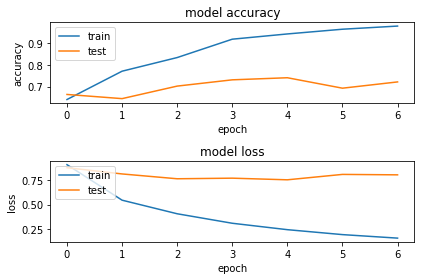

In [32]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without first input
school

In [45]:
x = np.delete(student_data, 0, axis = 1)

In [46]:
x

array([[1, -1.4329802763043944, 1, ..., 0.9481527247699899,
        0.4911367513733601, 1],
       [1, 1.0316951635937113, 1, ..., 0.9481527247699899,
        1.1780931126692884, 2],
       [1, -0.6114217963383591, 1, ..., -0.14548077945226706,
        -0.5392977905705323, 0],
       ...,
       [-1, -1.4329802763043944, -1, ..., -1.968203286489362,
        -1.5697323325144248, 0],
       [-1, 0.210136683627676, 1, ..., -0.14548077945226706,
        0.14765857072539595, 0],
       [1, -0.6114217963383591, -1, ..., -0.510025280859686,
        -0.5392977905705323, 0]], dtype=object)

In [40]:
model = keras.Sequential()
create_network(model)

In [41]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [42]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [43]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21507990658283233
Test accuracy: 0.8846153846153846


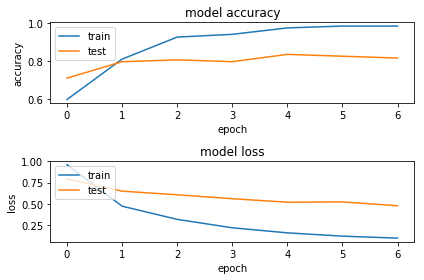

In [44]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without second input
sex

In [381]:
x = np.delete(student_data, 1, axis = 1)

In [382]:
model = keras.Sequential()
create_network(model)

In [383]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [384]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [385]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1699441297696187
Test accuracy: 0.9384615384615385


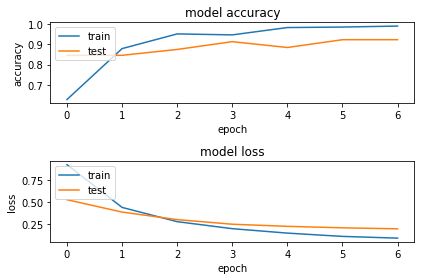

In [386]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without third input
age

In [387]:
x = np.delete(student_data, 2, axis = 1)

In [388]:
model = keras.Sequential()
create_network(model)

In [389]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [390]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [391]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.141285472879043
Test accuracy: 0.9769230769230769


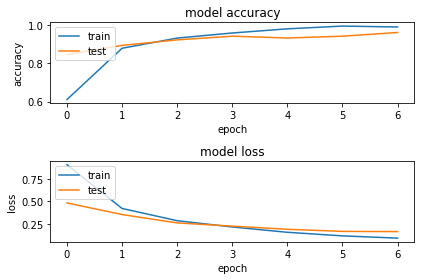

In [392]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fourth input
address

In [393]:
x = np.delete(student_data, 3, axis = 1)

In [394]:
model = keras.Sequential()
create_network(model)

In [395]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [396]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [397]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14911053066070262
Test accuracy: 0.9769230769230769


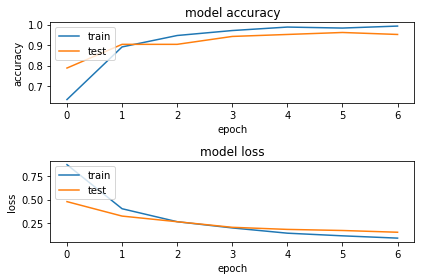

In [398]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fifth input
famsize

In [399]:
x = np.delete(student_data, 4, axis = 1)

In [400]:
model = keras.Sequential()
create_network(model)

In [401]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [402]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [403]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17957765918511612
Test accuracy: 0.9153846153846154


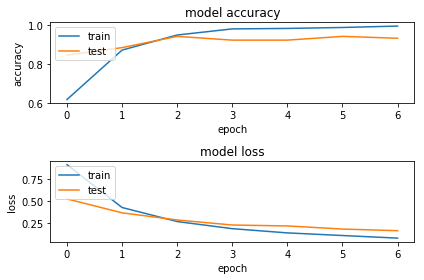

In [404]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without sixth input
parent's cohabitation status

In [405]:
x = np.delete(student_data, 5, axis = 1)

In [406]:
model = keras.Sequential()
create_network(model)

In [407]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [408]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [409]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17340317024634436
Test accuracy: 0.9153846153846154


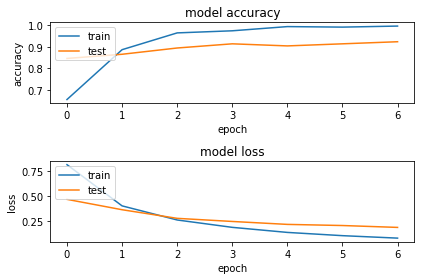

In [410]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without seventh input
mother's education

In [411]:
x = np.delete(student_data, 6, axis = 1)

In [412]:
model = keras.Sequential()
create_network(model)

In [413]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [414]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [415]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2024928542283865
Test accuracy: 0.9


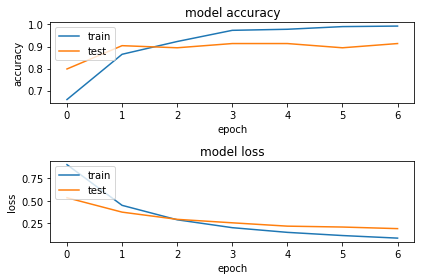

In [416]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eighth input
father's education

In [417]:
x = np.delete(student_data, 7, axis = 1)

In [418]:
model = keras.Sequential()
create_network(model)

In [419]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [420]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [421]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1690126772110279
Test accuracy: 0.9461538461538461


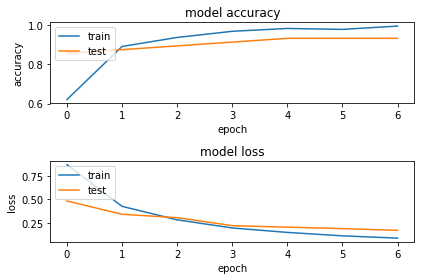

In [422]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without ninth input
mother's job

In [423]:
x = np.delete(student_data, 8, axis = 1)

In [424]:
model = keras.Sequential()
create_network(model)

In [425]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [426]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [427]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20976621302274556
Test accuracy: 0.8846153846153846


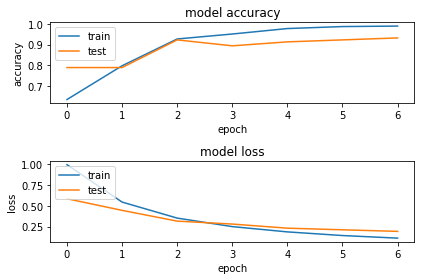

In [428]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without tenth input
father's job

In [429]:
x = np.delete(student_data, 9, axis = 1)

In [430]:
model = keras.Sequential()
create_network(model)

In [431]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [432]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [433]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1509892851114273
Test accuracy: 0.9692307692307692


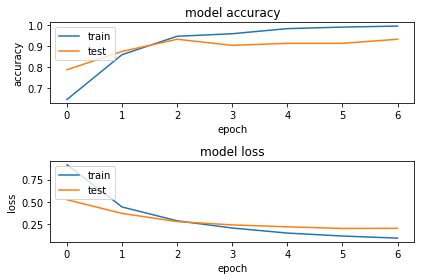

In [434]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eleventh input
reason to choose school

In [435]:
x = np.delete(student_data, 10, axis = 1)

In [436]:
model = keras.Sequential()
create_network(model)

In [437]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [438]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [439]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17438443646981167
Test accuracy: 0.9307692307692308


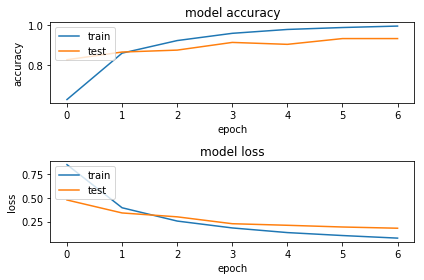

In [440]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twelvth input
guardian

In [441]:
x = np.delete(student_data, 11, axis = 1)

In [442]:
model = keras.Sequential()
create_network(model)

In [443]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [444]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [445]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14755416076916913
Test accuracy: 0.9615384615384616


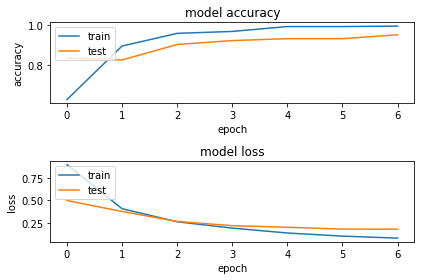

In [446]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirteenth input
travel time

In [447]:
x = np.delete(student_data, 12, axis = 1)

In [448]:
model = keras.Sequential()
create_network(model)

In [449]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [450]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [451]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2014089455971351
Test accuracy: 0.9


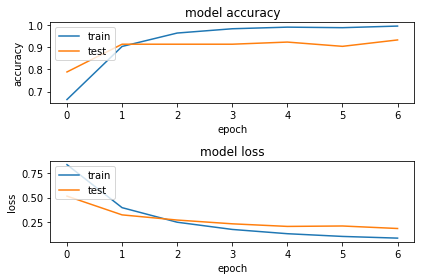

In [452]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fourteenth input
study time

In [453]:
x = np.delete(student_data, 13, axis = 1)

In [454]:
model = keras.Sequential()
create_network(model)

In [455]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [456]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [457]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18631311311171606
Test accuracy: 0.9230769230769231


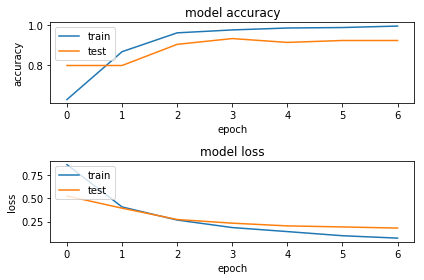

In [458]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without fifteenth input
failures

In [459]:
x = np.delete(student_data, 14, axis = 1)

In [460]:
model = keras.Sequential()
create_network(model)

In [461]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [462]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [463]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18091800235784972
Test accuracy: 0.9230769230769231


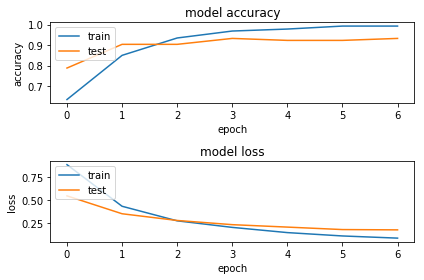

In [464]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without sixteenth input
school support

In [465]:
x = np.delete(student_data, 15, axis = 1)

In [466]:
model = keras.Sequential()
create_network(model)

In [467]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [468]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [469]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1687741531775548
Test accuracy: 0.9307692307692308


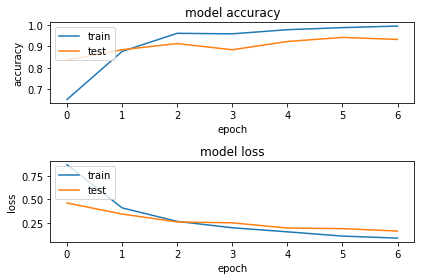

In [470]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without seventeenth input
family support

In [471]:
x = np.delete(student_data, 16, axis = 1)

In [472]:
model = keras.Sequential()
create_network(model)

In [473]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [474]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [475]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13600858037288371
Test accuracy: 0.9615384615384616


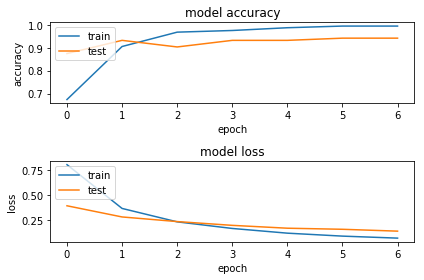

In [476]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without eighteenth input
paid class

In [477]:
x = np.delete(student_data, 17, axis = 1)

In [478]:
model = keras.Sequential()
create_network(model)

In [479]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [480]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [481]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1907138113792126
Test accuracy: 0.9153846153846154


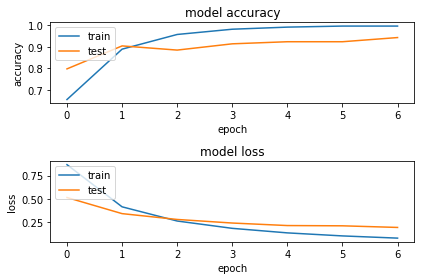

In [482]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without nineteenth input
activities

In [483]:
x = np.delete(student_data, 18, axis = 1)

In [484]:
model = keras.Sequential()
create_network(model)

In [485]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [486]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [487]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20041508628771856
Test accuracy: 0.8923076923076924


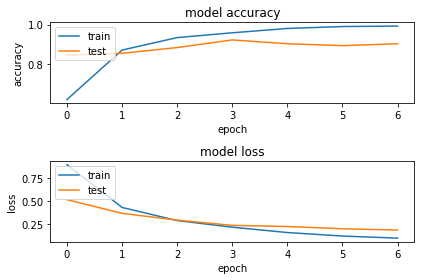

In [488]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twentieth input
nursery

In [489]:
x = np.delete(student_data, 19, axis = 1)

In [490]:
model = keras.Sequential()
create_network(model)

In [491]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [492]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [493]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1978229910135269
Test accuracy: 0.9230769230769231


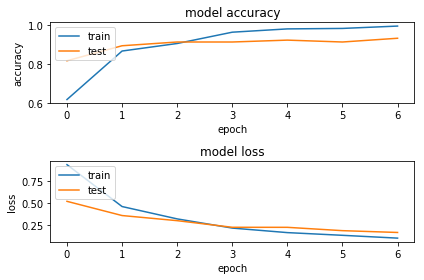

In [494]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-first input
higher

In [495]:
x = np.delete(student_data, 20, axis = 1)

In [496]:
model = keras.Sequential()
create_network(model)

In [497]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [498]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [499]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22963091490360407
Test accuracy: 0.8846153846153846


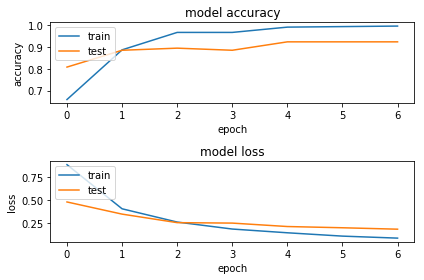

In [500]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-second input
internet

In [501]:
x = np.delete(student_data, 21, axis = 1)

In [502]:
model = keras.Sequential()
create_network(model)

In [503]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [504]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [505]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15376170460994426
Test accuracy: 0.9538461538461539


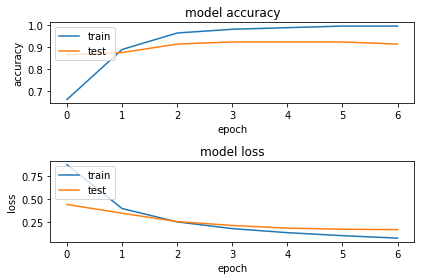

In [506]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-third input
romantic

In [507]:
x = np.delete(student_data, 22, axis = 1)

In [508]:
model = keras.Sequential()
create_network(model)

In [509]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [510]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [511]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13469933592356167
Test accuracy: 0.9615384615384616


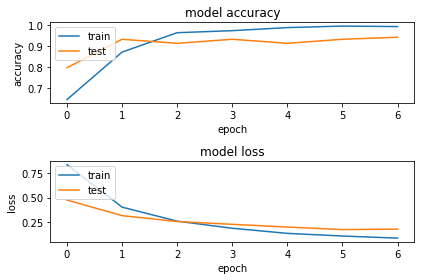

In [512]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-fourth input

In [513]:
x = np.delete(student_data, 23, axis = 1)

In [514]:
model = keras.Sequential()
create_network(model)

In [515]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [516]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [517]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.220087043597148
Test accuracy: 0.9076923076923077


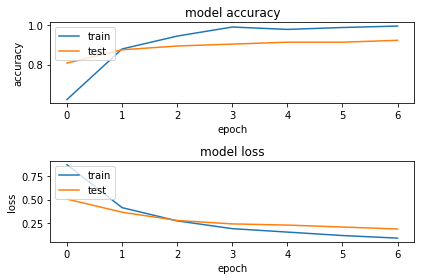

In [518]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-fifth input
free time

In [519]:
x = np.delete(student_data, 24, axis = 1)

In [520]:
model = keras.Sequential()
create_network(model)

In [521]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [522]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [523]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13624008492781567
Test accuracy: 0.9769230769230769


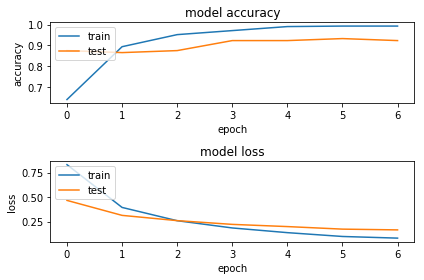

In [524]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-sixth input
go out

In [525]:
x = np.delete(student_data, 25, axis = 1)

In [526]:
model = keras.Sequential()
create_network(model)

In [527]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [528]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [529]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18918369504121635
Test accuracy: 0.9230769230769231


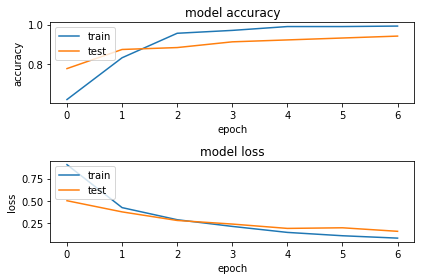

In [530]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-seventh input
weekend alcohol

In [531]:
x = np.delete(student_data, 26, axis = 1)

In [532]:
model = keras.Sequential()
create_network(model)

In [533]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [534]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [535]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15661220848560334
Test accuracy: 0.9692307692307692


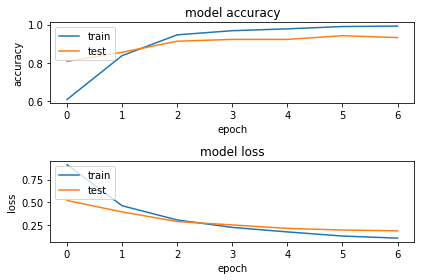

In [536]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-eighth input
weekday alcohol

In [537]:
x = np.delete(student_data, 27, axis = 1)

In [538]:
model = keras.Sequential()
create_network(model)

In [539]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [540]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [541]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17293971547713646
Test accuracy: 0.9153846153846154


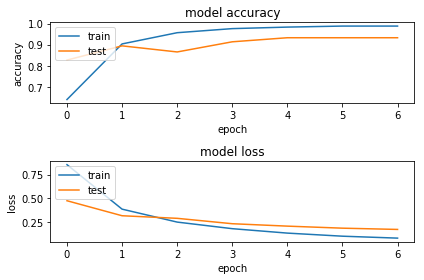

In [542]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without twenty-ninth input
health

In [543]:
x = np.delete(student_data, 28, axis = 1)

In [544]:
model = keras.Sequential()
create_network(model)

In [545]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [546]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [547]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18318928491610748
Test accuracy: 0.9230769230769231


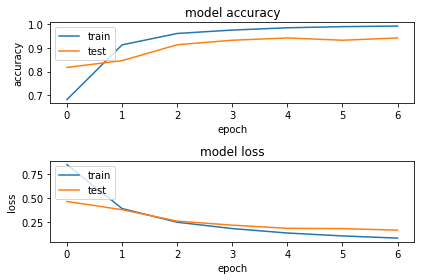

In [548]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirtieth input
absences

In [549]:
x = np.delete(student_data, 29, axis = 1)

In [550]:
model = keras.Sequential()
create_network(model)

In [551]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [552]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [553]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20463931766840127
Test accuracy: 0.8846153846153846


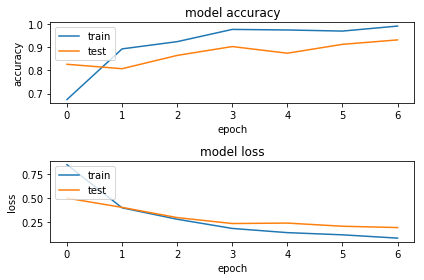

In [554]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-first input
G1

In [555]:
x = np.delete(student_data, 30, axis = 1)

In [556]:
model = keras.Sequential()
create_network(model)

In [557]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [558]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [559]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19189153542885415
Test accuracy: 0.9076923076923077


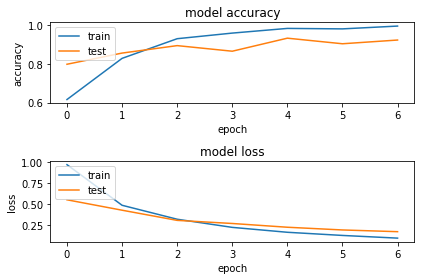

In [560]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-second input
G2

In [561]:
x = np.delete(student_data, 31, axis = 1)

In [562]:
model = keras.Sequential()
create_network(model)

In [563]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [564]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [565]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18745135366916657
Test accuracy: 0.9384615384615385


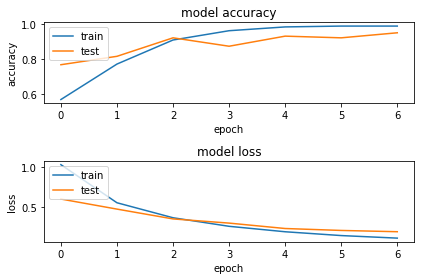

In [566]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without thirty-third input
G3

In [567]:
x = np.delete(student_data, 32, axis = 1)

In [568]:
model = keras.Sequential()
create_network(model)

In [569]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [570]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [571]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.47585347799154426
Test accuracy: 0.7846153846153846


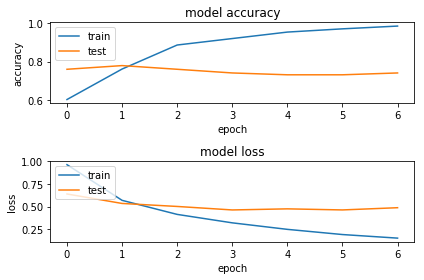

In [572]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

# without internet(21), higher(20), father's job(9), mother's job(8), or father's education(7)

In [573]:
x = np.delete(student_data, 21, axis = 1)
x = np.delete(x, 20, axis = 1)
x = np.delete(x, 9, axis = 1)
x = np.delete(x, 8, axis = 1)
x = np.delete(x, 7, axis = 1)

In [574]:
model = keras.Sequential()
create_network(model)

In [575]:
# split data into training and testing data
x_train = x[0:518,:]
x_test = x[519:649,:]

In [576]:
# train on training data!
history = model.fit(x_train, y_train,
                    batch_size = 32, 
                    epochs = 7, 
                    verbose = 0, 
                    validation_split = 0.2)

In [577]:
# validate using data the network hasn't seen before (testing data)
# check it's effectiveness
score = model.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17211584609288436
Test accuracy: 0.9230769230769231


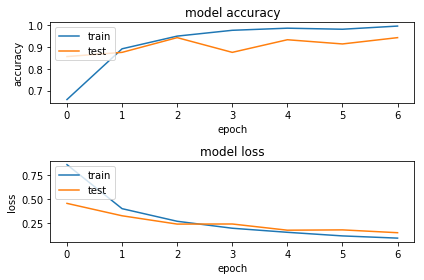

In [578]:
# plot the data

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

In [68]:
#PCfeatures = student_data[:,0:2]
#PCfeatures
PC1 = student_data[:,16] # fam support
PC2 = student_data[:,10] # reason

In [69]:
grades = Matrix(np.unique(student_data[:,32])).T
grades

[0  1  2  3  4]

In [70]:
Y = student_data[:,32]

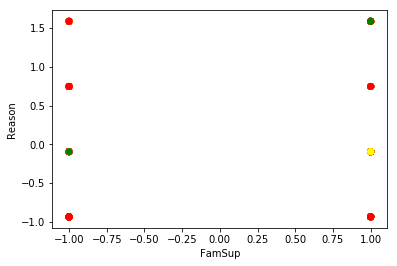

In [72]:
#plt.scatter(PCfeatures[:,0], PCfeatures[:,1],
plt.scatter(PC1, PC2,
            color=[['red','orange','yellow','green','blue'][i]
                   for i in Y.astype(int)])
plt.xlabel("FamSup")
plt.ylabel("Reason")
plt.show()

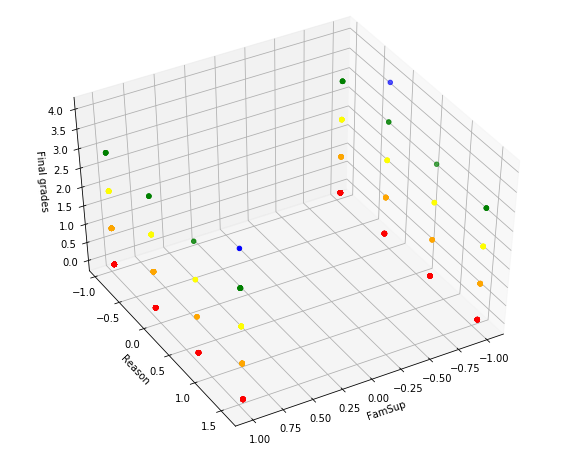

In [73]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figwidth(10)
fig.set_figheight(8)
ax.scatter(PC1,PC2,Y[:],
           color=[['red','orange','yellow','green','blue'][i]
                   for i in Y.astype(int)])
ax.set_xlabel("FamSup")
ax.set_ylabel("Reason")
ax.set_zlabel("Final grades")
ax.view_init(45,60)

In [79]:
famsup = []
nofamsup = []
for i in range(student_data.shape[0]):
    if (student_data[i][16]==1):
        famsup.append(student_data[i,:])
    else:
        nofamsup.append(student_data[i,:])

In [133]:
reason1 = []
#count1 = 0
reason2 = []
#count2 = 0
reason3 = []
#count3 = 0
reason4 = []
#count4 = 0
for i in range(len(famsup)):
    reason = student_data[i][10]
    if(reason==student_data[3][10]):
        reason1.append(student_data[i][32])
        #count1 += 1
    elif(reason==student_data[2][10]):
        reason2.append(student_data[i][32])
        #count2 += 1
    elif(reason==student_data[4][10]):
        reason3.append(student_data[i][32])
        #count3 += 1
    else:
        reason4.append(student_data[i][32])
        #count4 += 1

In [134]:
Matrix(np.unique(student_data[:,10])).T

[-0.933974050787213  -0.0944322793732224  0.745109492040769  1.58465126345476]

In [135]:
# reason3sum/count3

In [136]:
Matrix(np.unique(student_data[:,32])).T

[0  1  2  3  4]

In [137]:
student_data[:10,10]

array([1.5846512634547596, 1.5846512634547596, -0.09443227937322239,
       -0.9339740507872134, 0.7451094920407686, 0.7451094920407686,
       -0.09443227937322239, -0.9339740507872134, 0.7451094920407686,
       1.5846512634547596], dtype=object)

In [138]:
student_data[:,32]

array([1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 3, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 2, 0,
       2, 0, 1, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 2, 2, 3, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 3, 2, 0, 0, 1, 2, 3, 0, 0,
       2, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0, 0, 2, 1, 0,

In [139]:
#(reason1sum+reason2sum+reason3sum+reason4sum)/(count1+count2+count3+count4)

In [140]:
reason1

In [141]:
unique_grades = np.unique(student_data[:,32])
unique_grades.shape

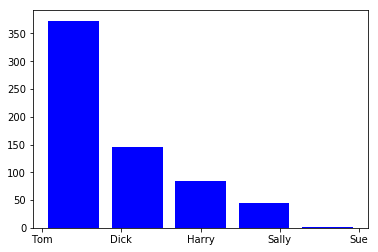

In [153]:

x = student_data[:,32]                          
num_bins = unique_grades.shape[0]
colors = ["blue" for i in range(649)]
# edit labels
locs, labels = plt.xticks()
#plt.xticks(np.arange(0, 1, step=0.8))
plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
plt.hist(x,num_bins,histtype="barstacked",color=colors,rwidth=0.8)
plt.show()

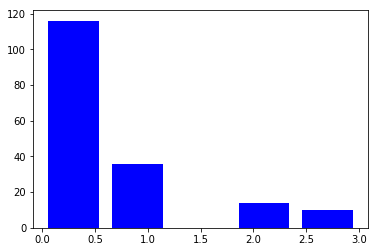

In [143]:
# reason1
plt.hist(reason1,num_bins,histtype="barstacked",color="blue",rwidth=0.8)
plt.show()

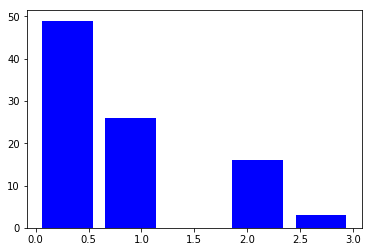

In [126]:
# reason2
plt.hist(reason2,num_bins,histtype="barstacked",color="blue",rwidth=0.8)
plt.show()

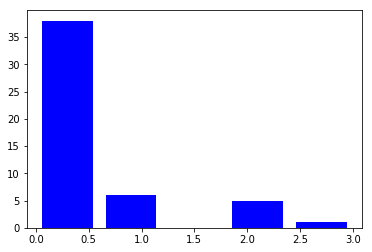

In [127]:
# reason3
plt.hist(reason3,num_bins,histtype="barstacked",color="blue",rwidth=0.8)
plt.show()

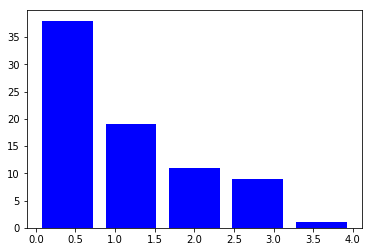

In [128]:
# reason4
plt.hist(reason4,num_bins,histtype="barstacked",color="blue",rwidth=0.8)
plt.show()

In [129]:
reason1

In [131]:
sums = np.array([0,0,0,0,0])
for i in range(len(reason1)):
    if(reason1[i]==0):
        sums[0] += 1
    elif(reason1[i]==1):
        sums[1] +=1
    elif(reason1[i]==2):
        sums[2] +=1
    elif(reason1[i]==3):
        sums[3] +=1
    else:
        sums[4] += 1

In [132]:
sums

array([116,  36,  14,  10,   0])

In [155]:
total = sums[0] + sums[1] + sums[2] + sums[3] + sums[4]
percentages = np.array([sums[0]/total*100, sums[1]/total*100, sums[2]/total*100, sums[3]/total*100, sums[4]/total*100])
percentages

array([65.90909091, 20.45454545,  7.95454545,  5.68181818,  0.        ])

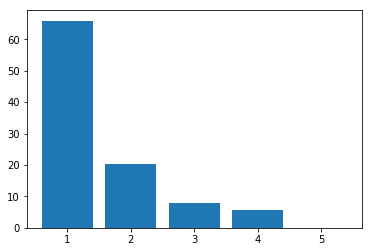

In [158]:
x = np.array([1,2,3,4,5])
plt.bar(x,percentages)
plt.show()